In [3]:
import os

# Check what files are inside the dataset folder
print(os.listdir(path))


['Mall_Customers.csv']


Dataset downloaded to: /kaggle/input/customer-segmentation-tutorial-in-python

First 5 rows of dataset:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


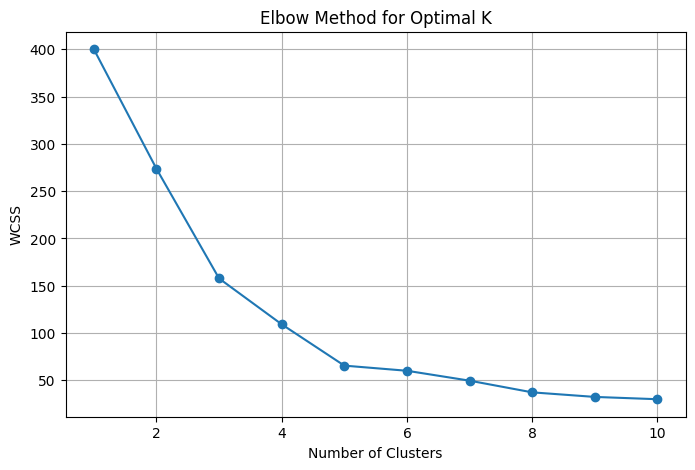


Silhouette Score: 0.5547


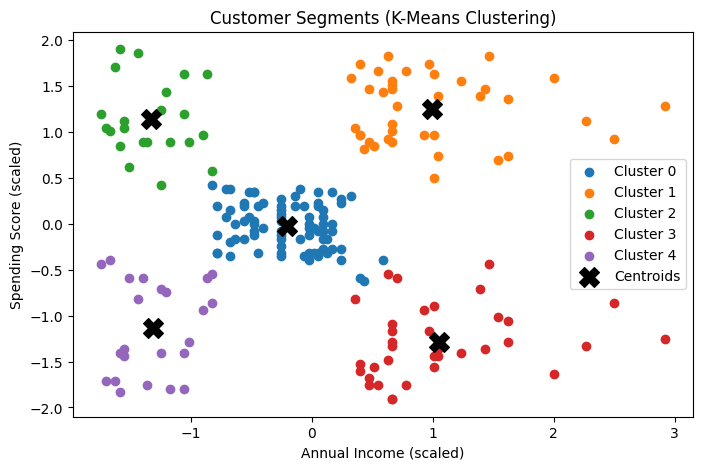


Clustered data saved to: /content/kmeans_customer_clusters.csv


In [2]:
# ==========================================
# Task 8: Clustering with K-Means
# Dataset: Mall Customer Segmentation
# ==========================================

# Step 1: Import libraries
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Step 2: Download and load dataset
print("Downloading dataset...")
path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")
print("Dataset downloaded to:", path)

df = pd.read_csv(path + "/Mall_Customers.csv")
print("\nFirst 5 rows of dataset:")
print(df.head())

# Step 3: Select features (Annual Income, Spending Score)
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Step 4: Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Elbow Method to find optimal K
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()

# Step 6: Apply K-Means with chosen K (e.g., 5)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df['Cluster'] = clusters

# Step 7: Silhouette Score
sil_score = silhouette_score(X_scaled, clusters)
print(f"\nSilhouette Score: {sil_score:.4f}")

# Step 8: Visualizing Clusters
plt.figure(figsize=(8,5))
for i in range(optimal_k):
    plt.scatter(X_scaled[clusters == i, 0], X_scaled[clusters == i, 1], label=f'Cluster {i}')

# Plot centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='black', marker='X', label='Centroids')

plt.title("Customer Segments (K-Means Clustering)")
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.legend()
plt.show()

# Step 9: Save processed dataset
output_path = "/content/kmeans_customer_clusters.csv"
df.to_csv(output_path, index=False)
print(f"\nClustered data saved to: {output_path}")
